# 분류
## 이진 분류
- 0과 1로 분류
- 획룰에서 기반한다.
- 분류기준으로 분류함으로 이진 분류가 일어난다.

## 성능평가
- 정확도
- 재현율
- 정밀도
- F-1 



In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [6]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

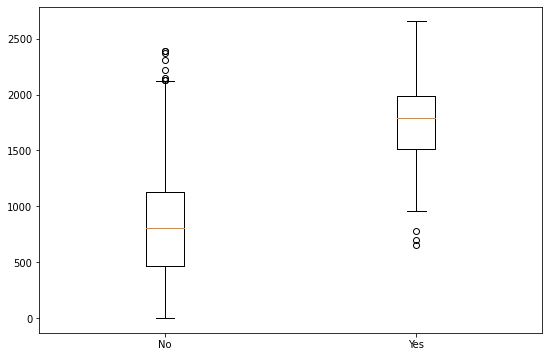

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.boxplot([df[df.default=='No'].balance,
             df[df.default=='Yes'].balance],
            labels=['No','Yes'])
plt.show()

In [9]:
# data preprocessing
# 1) standardization
X=df[['balance']]
y=df['default']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 2045)

In [12]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_hat =model1.predict(X_test)

In [14]:
model1.score(X_train,y_train)

0.9724285714285714

In [16]:
model1.score(X_test,y_test)

0.9736666666666667

In [18]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_hat,labels=['Yes','No'])

array([[  32,   72],
       [   7, 2889]])

In [19]:
from sklearn.metrics import precision_score,accuracy_score,recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9736666666666667
0.9756838905775076
0.9975828729281768


In [20]:
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9736666666666667
0.8205128205128205
0.3076923076923077


In [21]:
from sklearn.metrics import f1_score

f1_score(y_test,y_hat,pos_label='Yes')

0.44755244755244755

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat,target_names=['No','Yes'],digits=5))

              precision    recall  f1-score   support

          No    0.97568   0.99758   0.98651      2896
         Yes    0.82051   0.30769   0.44755       104

    accuracy                        0.97367      3000
   macro avg    0.89810   0.65264   0.71703      3000
weighted avg    0.97030   0.97367   0.96783      3000

